1/1 [==============================] - 0s 27ms/step
CIFAKE Model - Accuracy: 0.5125, Recall: 0.025, Precision: 1.0
Beta Model - Accuracy: 0.55, Recall: 0.125, Precision: 0.8333333333333334
Gamma Model - Accuracy: 0.5125, Recall: 0.125, Precision: 0.5555555555555556
Delta Model - Accuracy: 0.5375, Recall: 0.075, Precision: 1.0
Epsilon Model - Accuracy: 0.5125, Recall: 0.025, Precision: 1.0
Zeta Model - Accuracy: 0.5125, Recall: 0.025, Precision: 1.0


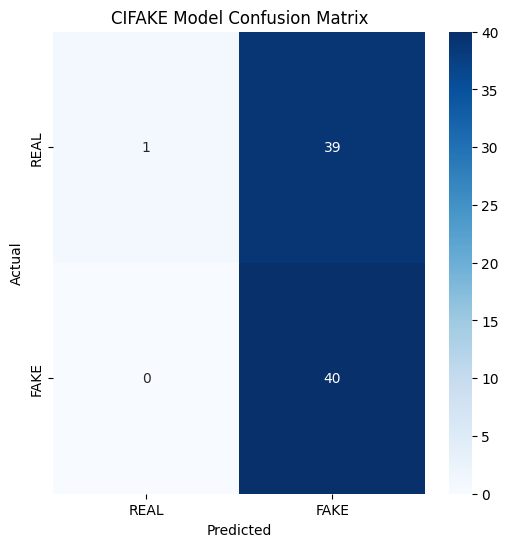

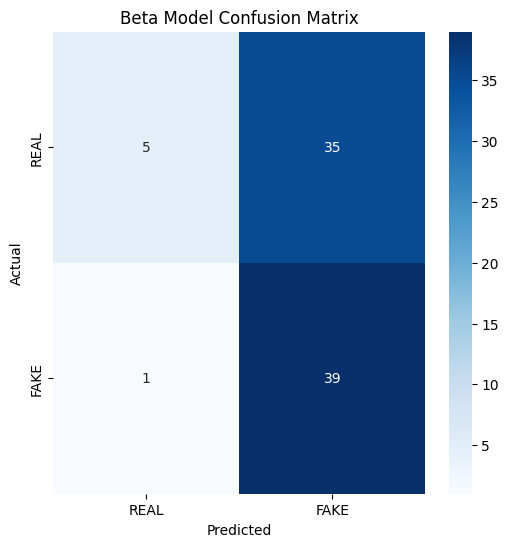

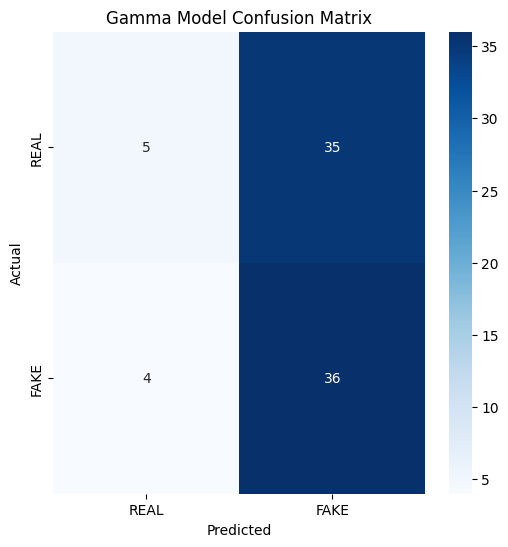

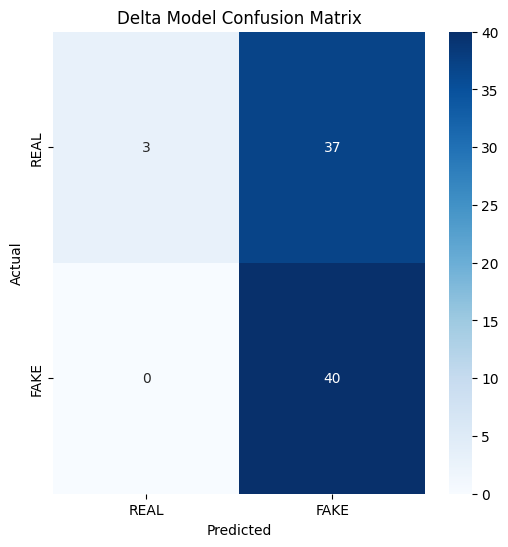

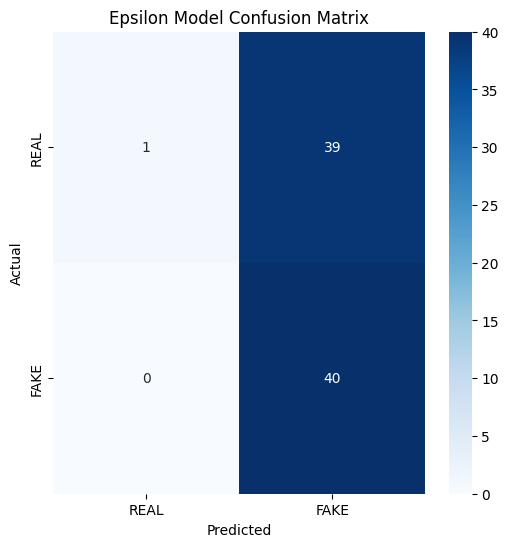

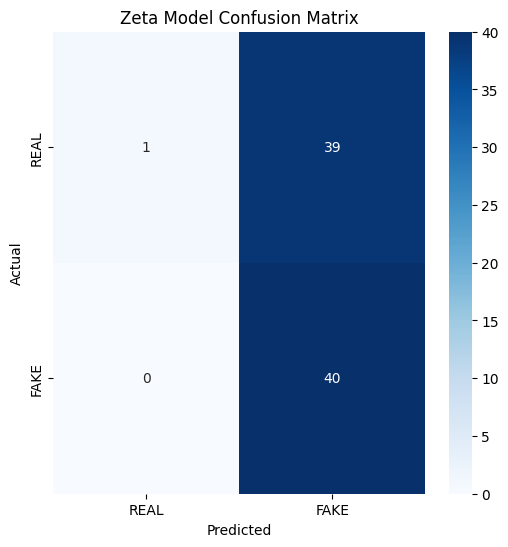

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

alpha = load_model('/content/alpha.h5')
beta = load_model('/content/beta.h5')
gamma = load_model('/content/gamma.h5')
delta = load_model('/content/deltaclassifier (4).h5')
epsilon = load_model('/content/epsilonclassifier.h5')
zeta = load_model('/content/zetaclassifier.h5')

#image_dir = "/content/ODD"
image_dir = "/content/ODD2"
data = []

# Initialize confusion matrices for each model
alpha_confusion_matrix = None
beta_confusion_matrix = None
gamma_confusion_matrix = None
delta_confusion_matrix = None
epsilon_confusion_matrix = None
zeta_confusion_matrix = None

true_labels = []  # Store true class labels
alpha_predictions = []  # Store alpha model predictions
beta_predictions = []  # Store beta model predictions
gamma_predictions = []  # Store gamma model predictions
delta_predictions = [] # Store delta model predictions
epsilon_predictions = []
zeta_predictions = []

for idx, image_name in enumerate(os.listdir(image_dir)):
    image_path = os.path.join(image_dir, image_name)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    resize = tf.image.resize(img, (32, 32))

    y_alpha = alpha.predict(np.expand_dims(resize / 255, 0))
    y_beta = beta.predict(np.expand_dims(resize / 255, 0))
    y_gamma = gamma.predict(np.expand_dims(resize / 255, 0))
    y_delta = delta.predict(np.expand_dims(resize / 255, 0))
    y_epsilon = epsilon.predict(np.expand_dims(resize / 255,0))
    y_zeta = zeta.predict(np.expand_dims(resize / 255,0))

    # Extract the class label from the file name without the file extension
    class_label = 'REAL' if 'real' in image_name.lower() else 'FAKE'

    true_labels.append(class_label)
    alpha_predictions.append('REAL' if y_alpha > 0.5 else 'FAKE')
    beta_predictions.append('REAL' if y_beta > 0.5 else 'FAKE')
    gamma_predictions.append('REAL' if y_gamma > 0.5 else 'FAKE')
    delta_predictions.append('REAL' if y_delta > 0.5 else 'FAKE')
    epsilon_predictions.append('REAL' if y_epsilon > 0.5 else 'FAKE')
    zeta_predictions.append('REAL' if y_zeta > 0.5 else 'FAKE')

    # Update the confusion matrices
    if alpha_confusion_matrix is not None:
        alpha_confusion_matrix += confusion_matrix([class_label], ['REAL' if y_alpha > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        beta_confusion_matrix += confusion_matrix([class_label], ['REAL' if y_beta > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        gamma_confusion_matrix += confusion_matrix([class_label], ['REAL' if y_gamma > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        delta_confusion_matrix += confusion_matrix([class_label], ['REAL' if y_delta > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        epsilon_confusion_matrix += confusion_matrix([class_label], ['REAL' if y_epsilon > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        zeta_confusion_matrix += confusion_matrix([class_label], ['REAL' if y_zeta > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
    else:
        alpha_confusion_matrix = confusion_matrix([class_label], ['REAL' if y_alpha > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        beta_confusion_matrix = confusion_matrix([class_label], ['REAL' if y_beta > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        gamma_confusion_matrix = confusion_matrix([class_label], ['REAL' if y_gamma > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        delta_confusion_matrix = confusion_matrix([class_label], ['REAL' if y_delta > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        epsilon_confusion_matrix = confusion_matrix([class_label], ['REAL' if y_epsilon > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])
        zeta_confusion_matrix = confusion_matrix([class_label], ['REAL' if y_zeta > 0.5 else 'FAKE'], labels=['REAL', 'FAKE'])

    data.append({
        'Image Index': idx,
        'Image Name': image_name,
        'Class Label': class_label,
        'CIFAKE Model Prediction': 'REAL' if y_alpha > 0.5 else 'FAKE',
        'Beta Model Prediction': 'REAL' if y_beta > 0.5 else 'FAKE',
        'Gamma Model Prediction': 'REAL' if y_gamma > 0.5 else 'FAKE',
        'Delta Model Prediction': 'REAL' if y_delta >0.5 else 'FAKE',
        'Epsilon Model Prediction': 'REAL' if y_epsilon >0.5 else 'FAKE',
        'Zeta MOdel Prediction': 'REAL' if y_zeta >0.5 else 'FAKE',
        'CIFAKE Model Probability': "{:.6f}".format(y_alpha[0][0]),  # Format as a float with 6 decimal places
        'Beta Model Probability': "{:.6f}".format(y_beta[0][0]),  # Format as a float with 6 decimal places
        'Gamma Model Probability': "{:.6f}".format(y_gamma[0][0]),  # Format as a float with 6 decimal places
        'Delta Model Probability': "{:.6f}".format(y_delta[0][0]),
        'Epsilon Model Probability': "{:.6f}".format(y_epsilon[0][0]),
        'Zeta Model Probability': "{:.6f}".format(y_zeta[0][0])

    })

df = pd.DataFrame(data)

# Calculate accuracy, recall, and precision for each model
alpha_accuracy = accuracy_score(true_labels, alpha_predictions)
alpha_recall = recall_score(true_labels, alpha_predictions, pos_label='REAL')
alpha_precision = precision_score(true_labels, alpha_predictions, pos_label='REAL')

beta_accuracy = accuracy_score(true_labels, beta_predictions)
beta_recall = recall_score(true_labels, beta_predictions, pos_label='REAL')
beta_precision = precision_score(true_labels, beta_predictions, pos_label='REAL')

gamma_accuracy = accuracy_score(true_labels, gamma_predictions)
gamma_recall = recall_score(true_labels, gamma_predictions, pos_label='REAL')
gamma_precision = precision_score(true_labels, gamma_predictions, pos_label='REAL')

delta_accuracy = accuracy_score(true_labels, delta_predictions)
delta_recall = recall_score(true_labels, delta_predictions, pos_label='REAL')
delta_precision = precision_score(true_labels, delta_predictions, pos_label='REAL')

epsilon_accuracy = accuracy_score(true_labels, epsilon_predictions)
epsilon_recall = recall_score(true_labels, epsilon_predictions, pos_label='REAL')
epsilon_precision = precision_score(true_labels, epsilon_predictions, pos_label='REAL')

zeta_accuracy = accuracy_score(true_labels, zeta_predictions)
zeta_recall = recall_score(true_labels, zeta_predictions, pos_label='REAL')
zeta_precision = precision_score(true_labels, zeta_predictions, pos_label='REAL')

# Print accuracy, recall, and precision for each model
print(f"CIFAKE Model - Accuracy: {alpha_accuracy}, Recall: {alpha_recall}, Precision: {alpha_precision}")
print(f"Beta Model - Accuracy: {beta_accuracy}, Recall: {beta_recall}, Precision: {beta_precision}")
print(f"Gamma Model - Accuracy: {gamma_accuracy}, Recall: {gamma_recall}, Precision: {gamma_precision}")
print(f"Delta Model - Accuracy: {delta_accuracy}, Recall: {delta_recall}, Precision: {delta_precision}")
print(f"Epsilon Model - Accuracy: {epsilon_accuracy}, Recall: {epsilon_recall}, Precision: {epsilon_precision}")
print(f"Zeta Model - Accuracy: {zeta_accuracy}, Recall: {zeta_recall}, Precision: {zeta_precision}")

# Generate and save confusion matrix plots for each model
def plot_confusion_matrix(conf_matrix, title, labels):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

labels = ['REAL', 'FAKE']
plot_confusion_matrix(alpha_confusion_matrix, 'CIFAKE Model Confusion Matrix', labels)
plot_confusion_matrix(beta_confusion_matrix, 'Beta Model Confusion Matrix', labels)
plot_confusion_matrix(gamma_confusion_matrix, 'Gamma Model Confusion Matrix', labels)
plot_confusion_matrix(delta_confusion_matrix, 'Delta Model Confusion Matrix', labels)
plot_confusion_matrix(epsilon_confusion_matrix, 'Epsilon Model Confusion Matrix', labels)
plot_confusion_matrix(zeta_confusion_matrix, 'Zeta Model Confusion Matrix', labels)

In [ ]:
df

,Image Index,Image Name,Class Label,CIFAKE Model Prediction,Beta Model Prediction,Gamma Model Prediction,CIFAKE Model Probability,Beta Model Probability,Gamma Model Probability
0,0,real8.jpeg,REAL,FAKE,FAKE,FAKE,0.026994,0.000000,0.000000
1,1,real43.jpeg,REAL,FAKE,FAKE,FAKE,0.000000,0.000000,0.000000
2,2,real29.jpeg,REAL,FAKE,FAKE,FAKE,0.000013,0.000000,0.000006
3,3,fake60.png,FAKE,FAKE,FAKE,FAKE,0.003224,0.000000,0.002749
4,4,real30.jpeg,REAL,FAKE,FAKE,FAKE,0.000382,0.000000,0.000008
...,...,...,...,...,...,...,...,...,...
139,139,fake30.png,FAKE,FAKE,FAKE,FAKE,0.000121,0.000000,0.000000
140,140,fake70.png,FAKE,FAKE,FAKE,FAKE,0.000924,0.000000,0.000002
141,141,real14.jpeg,REAL,FAKE,FAKE,FAKE,0.016944,0.000000,0.000000
142,142,real33.jpeg,REAL,FAKE,FAKE,FAKE,0.000358,0.024582,0.000015


In [ ]:
# Export CSV
output = 'scoredODD.csv'

df.to_csv(output, index=False)